In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('data/house_price_train.csv')

In [4]:
df_train.sample(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1331,1332,80,RL,55.0,10780,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,132500
425,426,60,RM,60.0,3378,Pave,Grvl,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,135000
241,242,30,RM,40.0,3880,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,110500
337,338,20,RL,70.0,9135,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,214000
599,600,160,RM,24.0,1950,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2008,COD,Normal,151000
82,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,245000
267,268,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500
580,581,20,RL,NaN,14585,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,181900


In [8]:
print(df_train.shape)
df_train.columns

(1460, 81)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [6]:
df_train.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'], dtype=object)

In [7]:
df_train.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [10]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

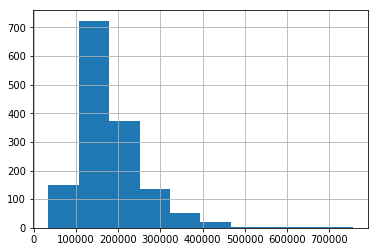

In [11]:
df_train.SalePrice.hist()

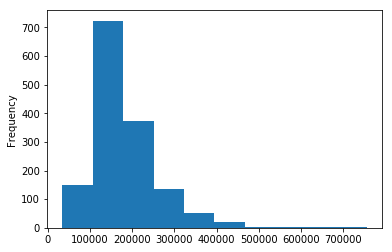

In [27]:
df_train.SalePrice.plot.hist()

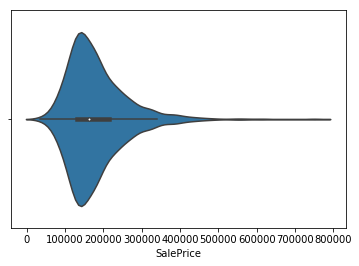

In [14]:
sns.violinplot(x='SalePrice', data=df_train)

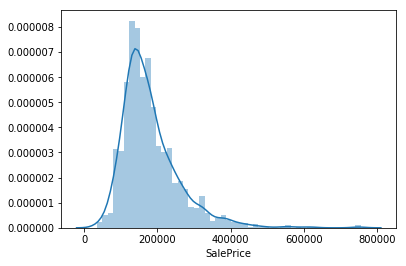

In [13]:
sns.distplot(df_train.SalePrice)

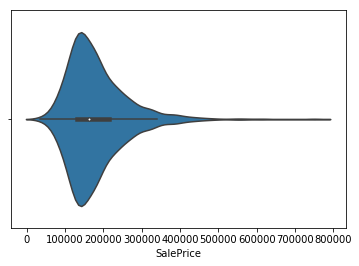

In [18]:
sns.violinplot(df_train.SalePrice)

In [24]:
print(df_train.SalePrice.skew(), df_train.SalePrice.kurtosis())

1.88287575977 6.53628186006


(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

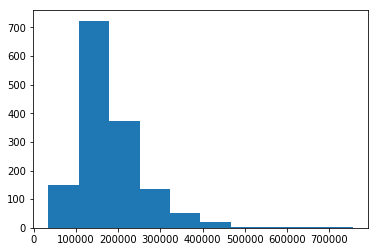

In [28]:
plt.hist(df_train.SalePrice)

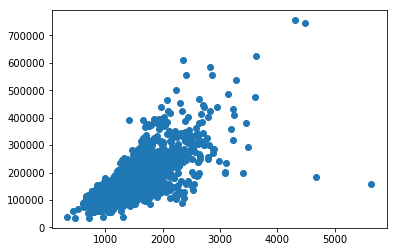

In [25]:
plt.scatter(df_train.GrLivArea, df_train.SalePrice)

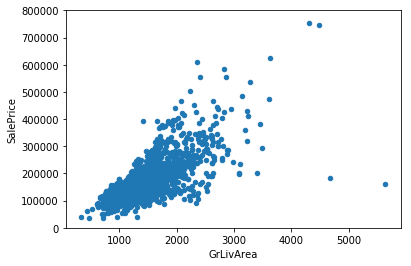

In [8]:
df_train.plot.scatter("GrLivArea", 'SalePrice', ylim=(0,800000))

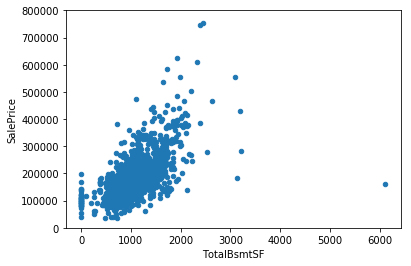

In [9]:
df_train.plot.scatter('TotalBsmtSF','SalePrice', ylim=(0,800000))

(0, 800000)

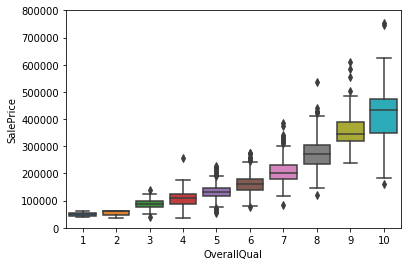

In [29]:
sns.boxplot(df_train.OverallQual, df_train.SalePrice)
plt.ylim([0,800000])

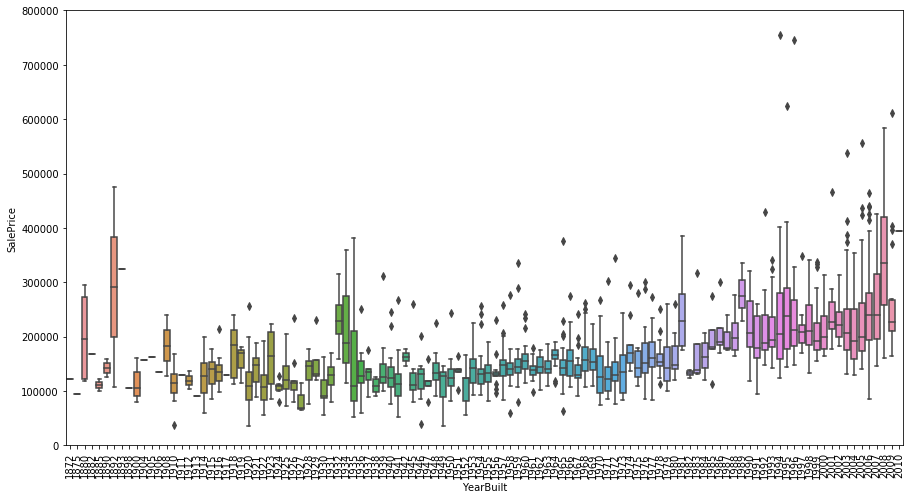

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(df_train.YearBuilt, df_train.SalePrice)
plt.ylim([0,800000])
plt.xticks(rotation=90)
plt.show()

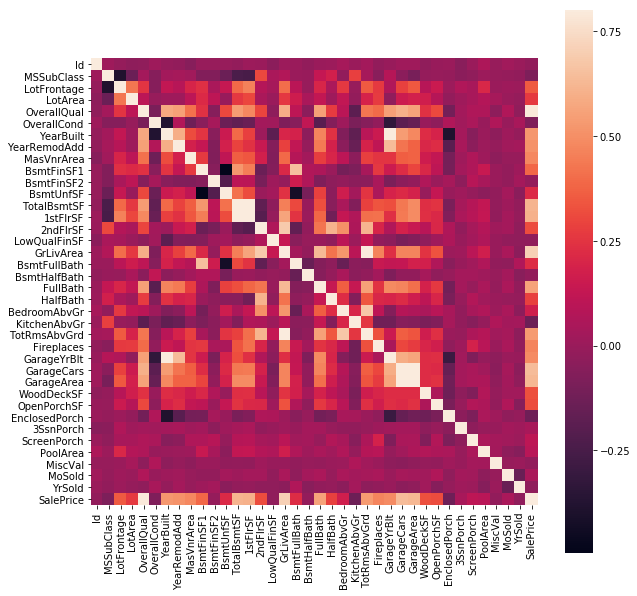

In [32]:
corre=df_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corre, square=True, vmax=0.8)

In [37]:
corre.nlargest(10,'SalePrice')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [39]:
cr=corre.nlargest(10, 'SalePrice')['SalePrice']
cr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [40]:
type(cr)

pandas.core.series.Series

In [41]:
cr.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [42]:
cols=corre.nlargest(10, 'SalePrice')['SalePrice'].index
cm=df_train[cols].corr()

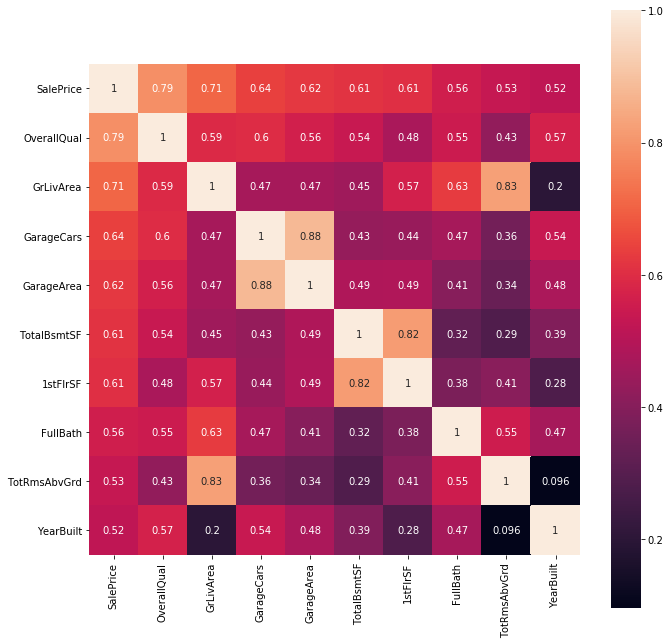

In [43]:
plt.figure(figsize=(11,11))
sns.heatmap(cm, square=True, annot=True, cbar=True)
plt.show()

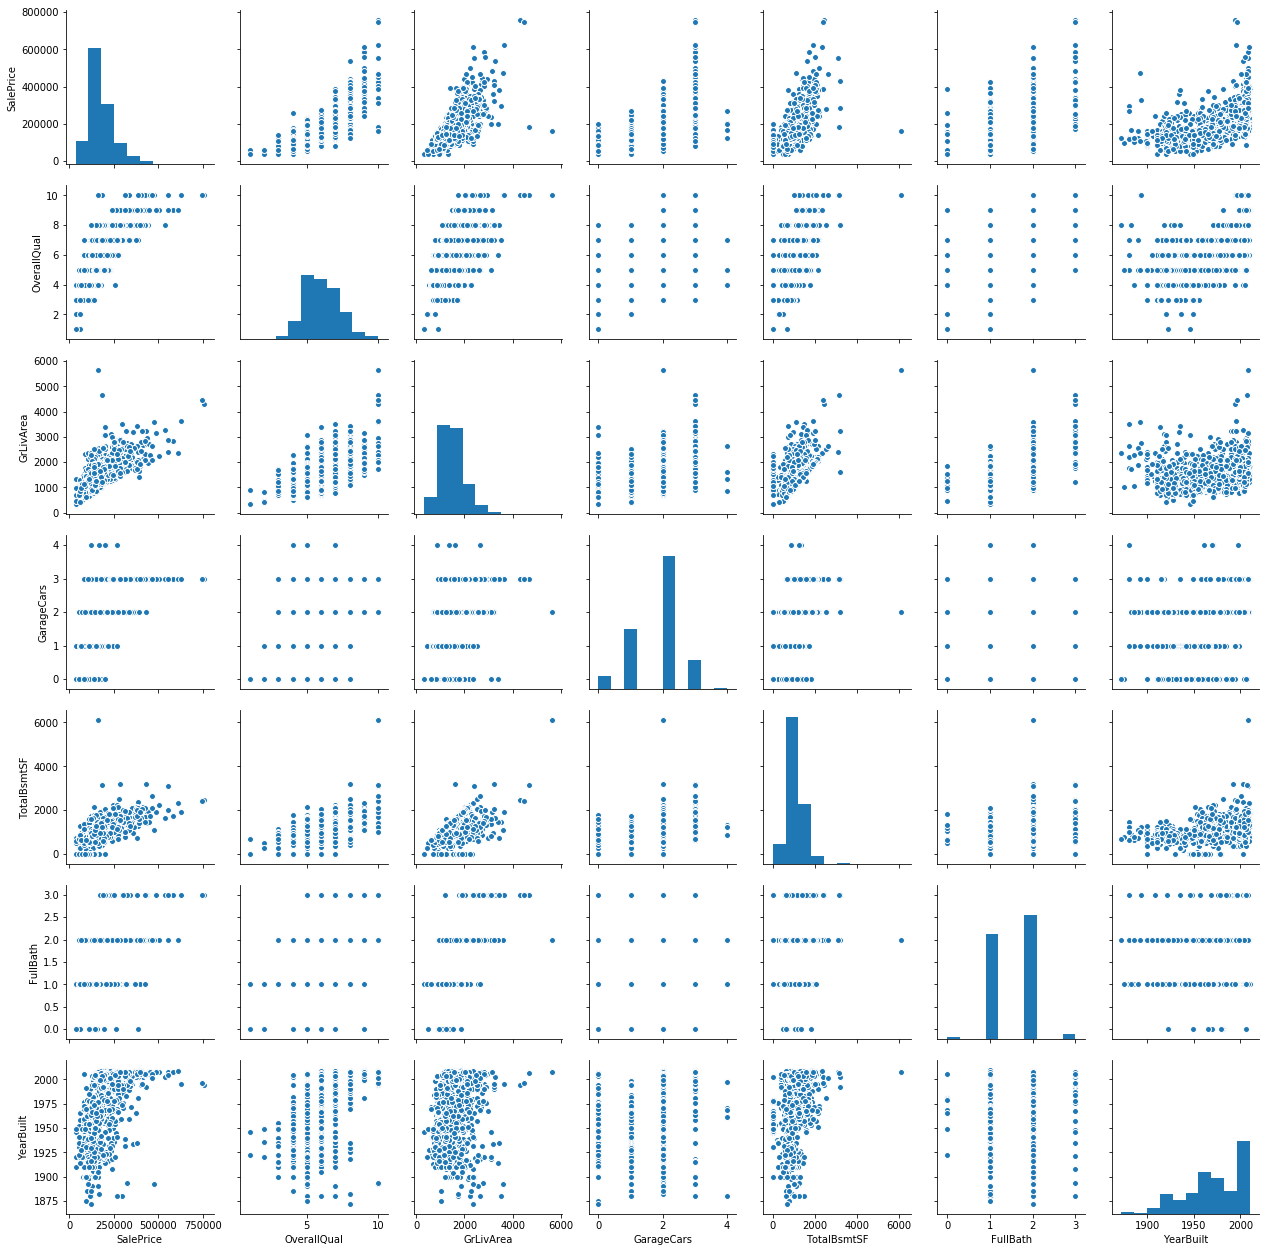

In [44]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

In [47]:
df_train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [45]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [46]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent=total/df_train.shape[0]
percent

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
BsmtUnfSF        0.000000
ScreenPorch      0.000000
PoolArea    

In [50]:
missing_data=pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing_data.head()

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [51]:
type(missing_data)

pandas.core.frame.DataFrame

In [52]:
missing_data.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Utilities', 'YearRemodAdd',
       'MSSubClass', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd',
       'Exterior1st', 'RoofMatl', 'RoofStyle', 'YearBuilt', 'LotConfig',
       'OverallCond', 'OverallQual', 'HouseStyle', 'BldgType', 'Condition2',
       'BsmtFinSF1', 'MSZoning', 'LotArea', 'Street', 'Condition1',
       'Neighborhood', 'LotShape', 'LandContour', 'LandSlope', 'SalePrice',
       'HeatingQC', 'BsmtFinSF2', 'EnclosedPorch', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'BsmtUnfSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'Functional', 'TotRmsAbvGrd', 'KitchenQual', 'KitchenAbvGr',

In [53]:
missing_data[missing_data.Total>1].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [54]:
df_train=df_train.drop(missing_data[missing_data.Total>0].index, axis=1)

In [55]:
df_train.isnull().sum().max()

0

In [60]:
from sklearn.preprocessing import StandardScaler

In [65]:
df_train.SalePrice.values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [66]:
sale_std=StandardScaler().fit_transform(df_train.SalePrice.values.reshape(-1,1))

In [75]:
sale_std

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ..., 
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [68]:
sorted(sale_std)[:10]

[array([-1.83870376]),
 array([-1.83352844]),
 array([-1.80092766]),
 array([-1.78329881]),
 array([-1.77448439]),
 array([-1.62337999]),
 array([-1.61708398]),
 array([-1.58560389]),
 array([-1.58560389]),
 array([-1.5731])]

In [69]:
sorted(sale_std)[-10:]

[array([ 3.82897043]),
 array([ 4.04098249]),
 array([ 4.49634819]),
 array([ 4.71041276]),
 array([ 4.73032076]),
 array([ 5.06214602]),
 array([ 5.42383959]),
 array([ 5.59185509]),
 array([ 7.10289909]),
 array([ 7.22881942])]

In [70]:
sorted(sale_std[:,0])[:10]

[-1.8387037612340333,
 -1.833528435547519,
 -1.8009276613324687,
 -1.7832988147117386,
 -1.7744843914013735,
 -1.6233799917951151,
 -1.6170839751448542,
 -1.5856038918935504,
 -1.5856038918935504,
 -1.5731000028261326]

In [77]:
ss=sorted(sale_std[:,0])
ss[-10:]

[3.8289704273307112,
 4.040982492011592,
 4.4963481922583526,
 4.7104127583672186,
 4.7303207630153432,
 5.0621460245506871,
 5.4238395890748672,
 5.591855089403726,
 7.1028990854663112,
 7.2288194184715264]

In [84]:
ss[::-1]  # reverse array!

[7.2288194184715264,
 7.1028990854663112,
 5.591855089403726,
 5.4238395890748672,
 5.0621460245506871,
 4.7303207630153432,
 4.7104127583672186,
 4.4963481922583526,
 4.040982492011592,
 3.8289704273307112,
 3.7030500943254956,
 3.5960178112710626,
 3.5771297613202804,
 3.4128037267484741,
 3.3411676493018074,
 3.2623289288072415,
 3.2469666481806052,
 3.2264920020339574,
 3.1364085958020262,
 3.0860404625999402,
 3.0718114649703505,
 3.0482643626983754,
 2.9512805222177585,
 2.9160480130428992,
 2.8845679297915954,
 2.7964236966879445,
 2.7946734040591723,
 2.7838316633874229,
 2.6981051006774726,
 2.6956874302837726,
 2.6908646815296726,
 2.6885351553690762,
 2.6642073470324683,
 2.6579113303822077,
 2.5855071389042088,
 2.5697670972785569,
 2.5697670972785569,
 2.5567973029790196,
 2.5193989640764709,
 2.5068069307759493,
 2.4879188808251671,
 2.4753268475246455,
 2.4743950370604066,
 2.4438467642733417,
 2.4312547309728201,
 2.4123666810220379,
 2.4111326617585869,
 2.391942403008

In [86]:
np.ndim(sale_std)

2

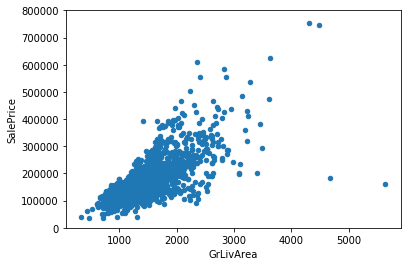

In [88]:
df_train.plot.scatter('GrLivArea','SalePrice', ylim=(0,800000))

In [87]:
df_train.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [89]:
df_train[df_train.Id==1299].index

Int64Index([1298], dtype='int64')

In [91]:
df_train=df_train.drop(df_train[df_train.Id==1299].index)
df_train=df_train.drop(df_train[df_train.Id==524].index)

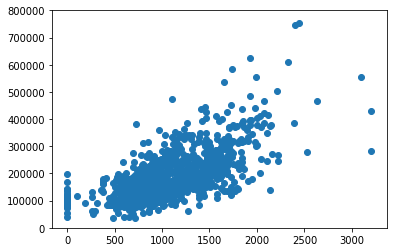

In [92]:
plt.scatter(df_train.TotalBsmtSF, df_train.SalePrice)
plt.ylim([0,800000])
plt.show()

In [93]:
from scipy.stats import norm
from scipy import stats

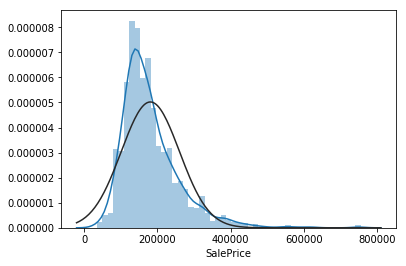

In [94]:
sns.distplot(df_train.SalePrice, fit=norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.259599766272, 180932.91906721535, 0.93201544928923685))

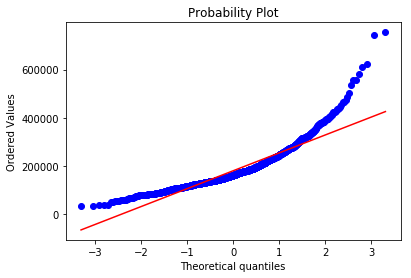

In [95]:
stats.probplot(df_train.SalePrice, plot=plt)

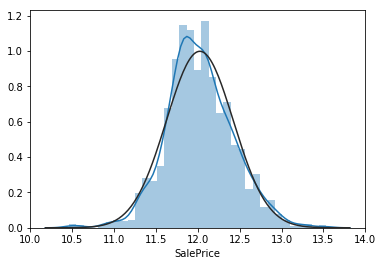

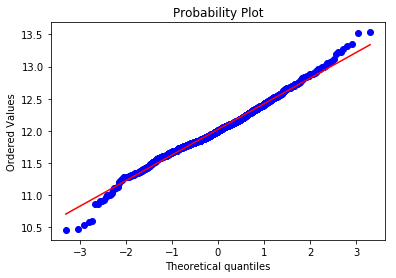

In [96]:
df_train.SalePrice=np.log(df_train.SalePrice)
sns.distplot(df_train.SalePrice, fit=norm)
plt.figure()
stats.probplot(df_train.SalePrice, plot=plt)
plt.show()

In [97]:
def draw_plot(col):
    sns.distplot(df_train[col], fit=norm)
    plt.figure()
    stats.probplot(df_train[col], plot=plt)
    plt.show()

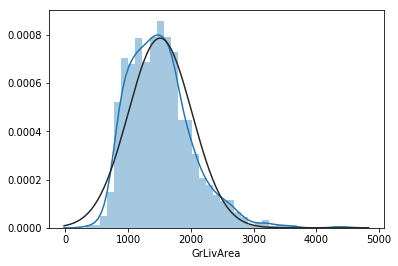

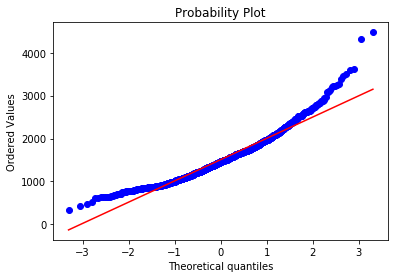

In [98]:
draw_plot('GrLivArea')

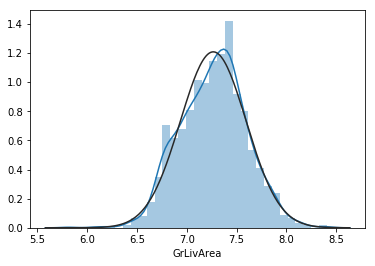

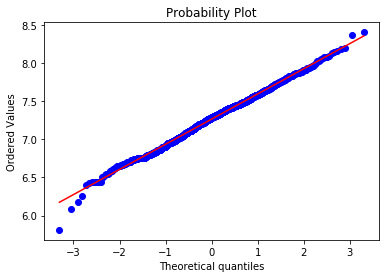

In [99]:
df_train.GrLivArea=np.log(df_train.GrLivArea)
draw_plot('GrLivArea')

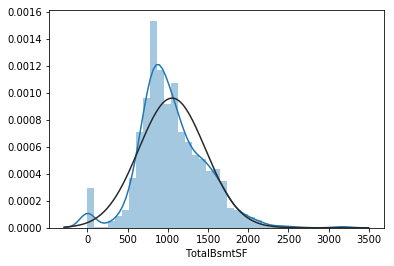

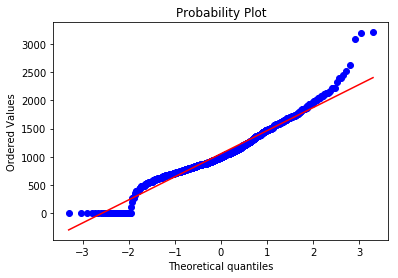

In [100]:
draw_plot('TotalBsmtSF')

In [101]:
df_train.TotalBsmtSF.value_counts()

0       37
864     35
672     17
912     15
1040    14
816     13
728     12
768     12
780     11
894     11
848     11
832     10
952      9
630      9
756      9
1056     8
936      8
483      7
720      7
384      7
1008     7
600      7
840      7
858      6
884      6
876      6
1362     6
1392     6
796      6
928      5
        ..
1202     1
1203     1
1205     1
1210     1
1215     1
1218     1
1219     1
1221     1
1223     1
1224     1
1225     1
1226     1
1235     1
1241     1
1242     1
1244     1
1246     1
1247     1
1251     1
1253     1
1257     1
1260     1
1261     1
1266     1
1267     1
1269     1
1271     1
1272     1
1273     1
1098     1
Name: TotalBsmtSF, Length: 719, dtype: int64

In [102]:
df_train['hasBsmt']=0
df_train['hasBsmt'][df_train.TotalBsmtSF>0]=1
df_train.hasBsmt

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1430    1
1431    1
1432    1
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
Name: hasBsmt, Length: 1458, dtype: int64

In [103]:
df_train.TotalBsmtSF[df_train.hasBsmt>0]=np.log(df_train.TotalBsmtSF)

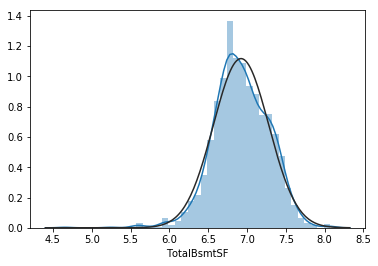

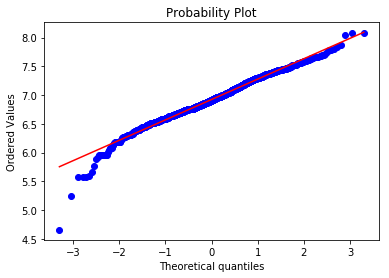

In [104]:
sns.distplot(df_train.TotalBsmtSF[df_train.hasBsmt>0],fit=norm)
plt.figure()
stats.probplot(df_train.TotalBsmtSF[df_train.hasBsmt>0],plot=plt)
plt.show()

In [105]:
pd.get_dummies(df_train).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=217)

In [106]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'hasBsmt'],
      dtype='object')